# Study the influence of weighted edges on classification

* **unweighted** algorithm fixes the values of the edges to 1
* **weighted** algorithm weights an edge as the *similarity* between the two nodes *times* the *number of instances* of the neighbor

In [26]:
# imports
from copy import deepcopy
import numpy as np

from sklearn.utils import shuffle

import sys
sys.path.append('../src/')

from evaluation import alpha_variance, loss, mean_accuracy
from network import line_network, synthetic_graph
from optimization import average_FW, centralized_FW
from utils import generate_models, generate_samples

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
NB_ITER = 1000
N = 99
D = 10
NOISE_R = 0.05
random_state = 2017
V, theta_true, cluster_indexes = generate_models(nb_clust=3, nodes_per_clust=N // 3, random_state=random_state)
_, X, Y, X_test, Y_test, _, _ = generate_samples(V, theta_true, D, random_state=random_state, sample_error_rate=NOISE_R)

# set graph
nodes = synthetic_graph(X, Y, X_test, Y_test, V, theta_true)

# set callbacks for optimization analysis
callbacks = {
    'mean-accuracy': [mean_accuracy, []],
    'loss': [loss, []],
    'alpha-variance': [alpha_variance, []]
}

In [28]:
results = {}

nodes_copy = deepcopy(nodes)
results["unweighted"] = average_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)
nodes_copy = deepcopy(nodes)
results["weighted"] = average_FW(nodes_copy, D, NB_ITER, weighted=True, callbacks=callbacks)
nodes_copy = deepcopy(nodes)
results["centralized"] = centralized_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

print("done")

done


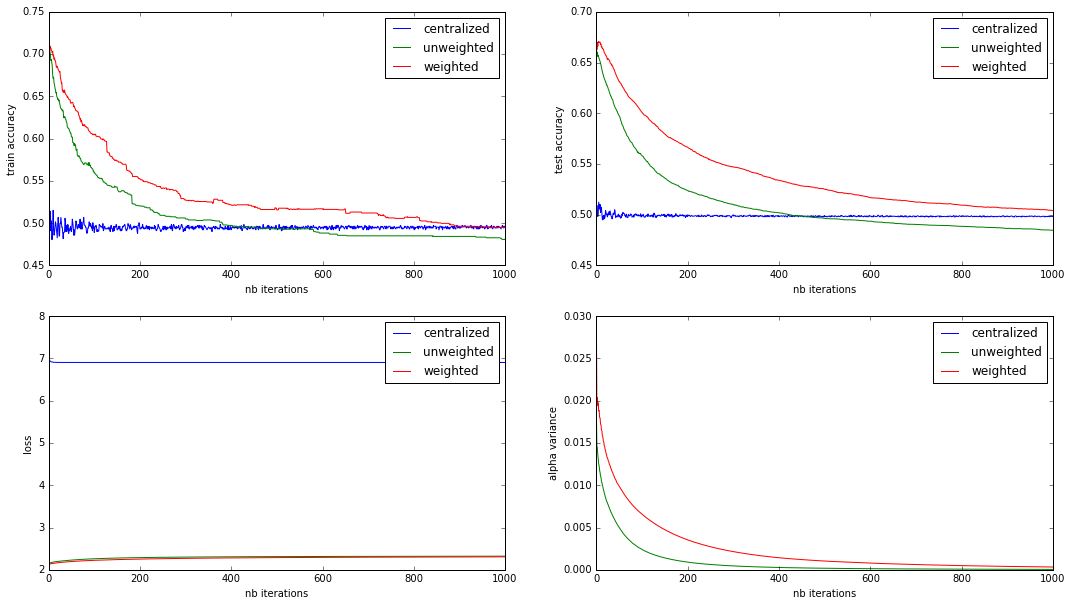

In [29]:
plt.figure(1, figsize=(18, 10))

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][0] for r in r_list], label='{}'.format(k))
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][1] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['loss'] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('alpha variance')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['alpha-variance'] for r in r_list], label='{}'.format(k))

plt.legend()

- both methods make the local classifiers convergence to a common classifier
- 

### no label noise

In [30]:
NB_ITER = 1000
N = 100
D = 10
NOISE_R = 0
random_state = 2017
V, theta_true, cluster_indexes = generate_models(nb_clust=1, nodes_per_clust=N, random_state=random_state)
_, X, Y, X_test, Y_test, _, _ = generate_samples(V, theta_true, D, random_state=random_state, sample_error_rate=NOISE_R)

# set graph
nodes = synthetic_graph(X, Y, X_test, Y_test, V, theta_true)

# set callbacks for optimization analysis
callbacks = {
    'mean-accuracy': [mean_accuracy, []],
    'loss': [loss, []],
    'alpha-variance': [alpha_variance, []]
}

In [31]:
results = {}

nodes_copy = deepcopy(nodes)
results["unweighted"] = average_FW(nodes_copy, N, NB_ITER, callbacks=callbacks)

nodes_copy = deepcopy(nodes)
results["weighted"] = average_FW(nodes_copy, N, NB_ITER, weighted=True, callbacks=callbacks)

nodes_copy = deepcopy(nodes)
results["centralized"] = centralized_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

print("done")

done


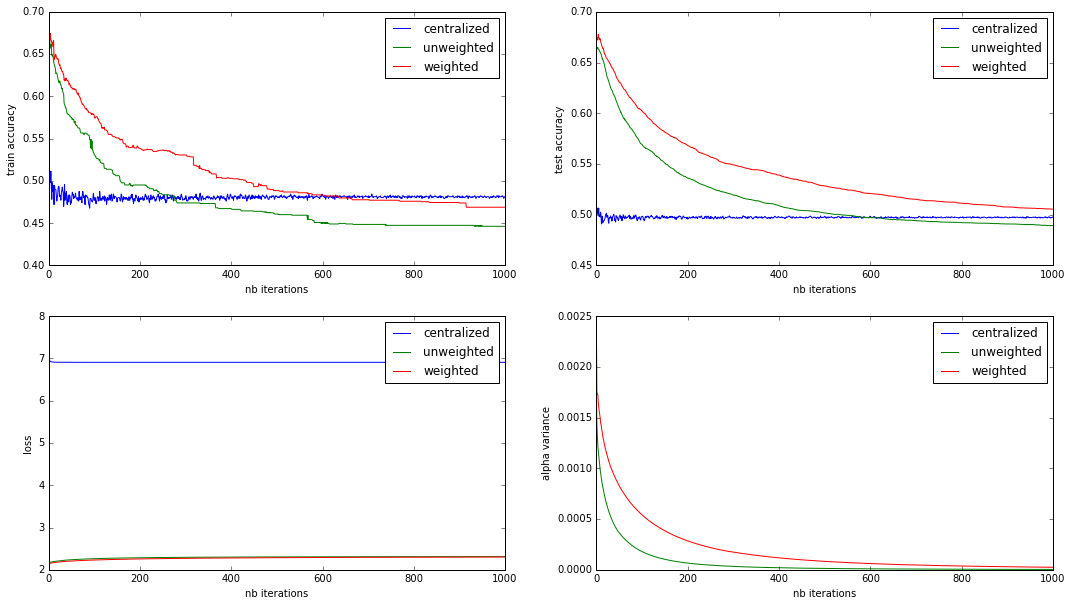

In [32]:
plt.figure(1, figsize=(18, 10))

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][0] for r in r_list], label='{}'.format(k))
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][1] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['loss'] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('alpha variance')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['alpha-variance'] for r in r_list], label='{}'.format(k))

plt.legend()